In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib notebook
%run ../quaternion/quaternion.py

In [2]:
def vector_normalize(v):
    return v / np.linalg.norm(v)

def plot_vector(axes, *, position, direction, length=1., linewidth=1.0, linestyle='solid', color='r', alpha=1.):
    axes.quiver(position[0], position[1], position[2], direction[0], direction[1], direction[2], length=length, linewidth=linewidth, linestyle=linestyle, color=color, alpha=alpha)

def plot_basis(axes, *, length=1., linewidth=1.):
    org = np.zeros(3)
    plot_vector(axes, position=org, direction=np.array([1., 0., 0.]), length=length, linewidth=linewidth, linestyle='dashed', color='k')
    plot_vector(axes, position=org, direction=np.array([0., 1., 0.]), length=length, linewidth=linewidth, linestyle='dashed', color='k')
    plot_vector(axes, position=org, direction=np.array([0., 0., 1.]), length=length, linewidth=linewidth, linestyle='dashed', color='k')

def plot_sphere(axes, *, radius=1., color='r', alpha=1.):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
    axes.plot_surface(x, y, z,  rstride=4, cstride=4, color=color, alpha=alpha)

Draw nlerp and slerp paths.

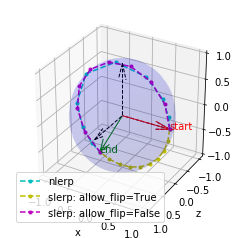

In [3]:
def plot1():
    r = Quaternion.from_axis_angle(np.array([0., 0., 1.]), math.radians(240.))
    q = Quaternion.from_axis_angle(np.array([0., 0., 1.]), math.radians(0.))
    v  = np.array([1., 0., 0.])

    # The interpolation of Quaternions q and r, at time t.
    nlerp_path = []
    slerp_path1 = []
    slerp_path2 = []
    for t in np.linspace(0., 1., 10):
        # nlerp
        p = Quaternion.normalize(Quaternion.lerp(q, r, t))
        nlerp_path.append(Quaternion.rotate(p, v))
        # Interpolate along a shortest arc.
        p = Quaternion.slerp(q, r, t, allow_flip=True)
        slerp_path1.append(Quaternion.rotate(p, v))
        # Interpolate along a great circle.
        p = Quaternion.slerp(q, r, t, allow_flip=False)
        slerp_path2.append(Quaternion.rotate(p, v))

    us = slerp_path1[0]
    ue = slerp_path1[-1]

    nlerp_path = np.array(nlerp_path).transpose()
    slerp_path1 = np.array(slerp_path1).transpose()
    slerp_path2 = np.array(slerp_path2).transpose()
    #
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1, projection='3d')

    plot_sphere(axes, color='b', alpha=0.1)
    plot_basis(axes)
    plot_vector(axes, position=np.zeros(3), direction=np.take(us, (0, 2, 1)), color='r')
    axes.text(us[0], us[2], us[1], 'start', color='r')
    plot_vector(axes, position=np.zeros(3), direction=np.take(ue, (0, 2, 1)), color='g')
    axes.text(ue[0], ue[2], ue[1], 'end', color='g')
    axes.plot(nlerp_path[0], nlerp_path[2], nlerp_path[1], linestyle='dashed', marker='o', markersize=3, color='c', label='nlerp')
    axes.plot(slerp_path1[0], slerp_path1[2], slerp_path1[1], linestyle='dashed', marker='o', markersize=3, color='y', label='slerp: allow_flip=True')
    axes.plot(slerp_path2[0], slerp_path2[2], slerp_path2[1], linestyle='dashed', marker='o', markersize=3, color='m', label='slerp: allow_flip=False')
    axes.legend()

    axes.set_aspect('equal', adjustable='box')
    axes.set_xlabel('x')
    axes.set_ylabel('z')
    axes.set_zlabel('y')
    axes.invert_yaxis()
    plt.show()
    
plot1()